In [ ]:
#Presentado por:
#Abdel Silva

#system
import os
import sys

#DataScience
import pandas as pd    #pandas

#analisis numerico
import numpy as np

#librerias graficas
import matplotlib.pyplot as plt
import seaborn as sns

#M l  ----"Machine Learning"
import tensorflow as tf
import keras
import sklearn
from sklearn.model_selection import train_test_split

#Se importa el dataset de internet
url = "https://drive.google.com/uc?export=download&id=1pr8KF5V5v6loxfXrXBIuU8f7G4UOtSoR" #leer de internet
df_Data = pd.read_csv(url, sep=',') #Leer archivo de url y separar por comas

#reduccion manual del dataset
df_Data=df_Data.drop(columns=['type','mfr','fiber','carbo','potass','vitamins','shelf','cups','weight','name'])

df_Data.head()


,calories,protein,fat,sodium,sugars,rating
0,70,4,1,130,6,68.402973
1,120,3,5,15,8,33.983679
2,70,4,1,260,5,59.425505
3,50,4,0,140,0,93.704912
4,110,2,2,200,8,34.384843


In [ ]:
df_Data.tail()

,calories,protein,fat,sodium,sugars,rating
72,110,2,1,250,3,39.106174
73,110,1,1,140,12,27.753301
74,100,3,1,230,3,49.787445
75,100,3,1,200,3,51.592193
76,110,2,1,200,8,36.187559


# *Descripción:*

El dataset que en un principio se utilizó incluye las características de distintos fabricantes de cereales para el desayuno o para cualquier ocasión. 

Las variables que incluía eran las siguientes:
- Nombre del cereal 
- Fabricante deñ cereal
- Tipo
- Calorías 
- Proteínas
- Grasa
- Sodio 
- Fibra
- Carbohidratos
- Azúcares
- Potasio
- Azúcares
- Vitaminas
- Porcentaje
- Estante
- Peso
- Taza
- Calificación


Datos que hay en las columnas:
Nombre: Nombre del cereal
mfr: Fabricante del cereal
calorías: calorías por porción
proteína: gramos de proteína
grasa: gramos de grasa
sodio: miligramos de sodio
fibra: gramos de fibra dietética
carbo: gramos de carbohidratos complejos
azúcares: gramos de azúcares
potasio: miligramos de potasio
vitaminas: vitaminas y minerales
estante: estante de exhibición 
peso: peso en onzas de una porción
tazas: número de tazas en una porción
calificación: porcentaje de calificación de los cereales

FEATURES (POSIBILIDADES)
- Calorías
- Proteína
- Grasa
- Sodio
- Fibra
- Carbohidratos
- Azúcares
- Potasio
- Vitaminas
- Peso
- Taza

TARGET (POSIBILIDADES)
- Nombre del cereal
- Fabricante del cereal
- Estante de exhibición
- Calificacion

In [ ]:
#renombramiento de los features en español (columnas)
f = {"calories":"Calorias",  "protein":"Proteina", "sodium":"Sodio", "sugars":"Azucares","rating":"target", "fat":"Grasa"}

df_Data.rename(columns = f, inplace=True)             #renombramiento

print(df_Data)

'''
for i in range(len(df_Data)):
  if df_Data["Marca"][i] == "Froot Loops":
    print(df_Data.loc[i])
'''

    Calorias  Proteina  Grasa  Sodio  Azucares     target
0         70         4      1    130         6  68.402973
1        120         3      5     15         8  33.983679
2         70         4      1    260         5  59.425505
3         50         4      0    140         0  93.704912
4        110         2      2    200         8  34.384843
..       ...       ...    ...    ...       ...        ...
72       110         2      1    250         3  39.106174
73       110         1      1    140        12  27.753301
74       100         3      1    230         3  49.787445
75       100         3      1    200         3  51.592193
76       110         2      1    200         8  36.187559

[77 rows x 6 columns]


'\nfor i in range(len(df_Data)):\n  if df_Data["Marca"][i] == "Froot Loops":\n    print(df_Data.loc[i])\n'

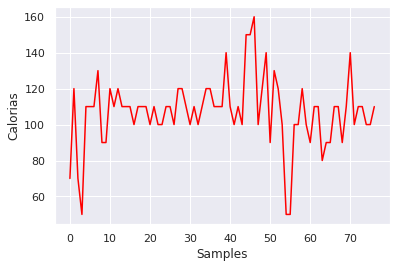

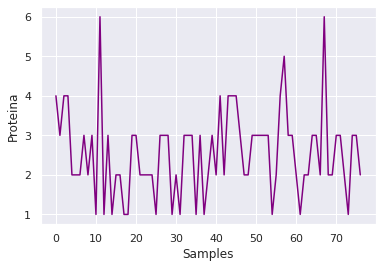

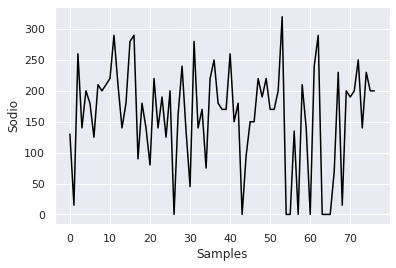

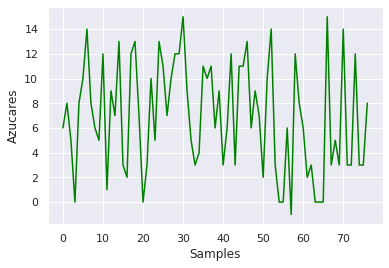

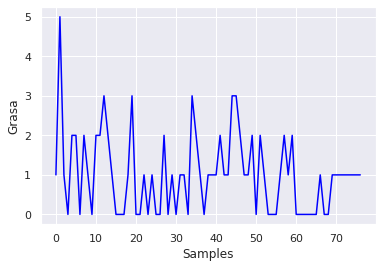

In [ ]:
#Convertir a la celda en grafico
%matplotlib inline

#Graficar
k = ["Calorias","Proteina","Sodio","Azucares","Grasa"]   #Columnas a graficar
colores = ["red","purple","black","green","blue"]      #Color de columnas
n=0
while n != 5:
  plt.plot(df_Data[k[n]], color=colores[n])     #Columnas a graficar y el color
  plt.ylabel(k[n])                              #Nombre de los datos en Y
  plt.xlabel("Samples")                         #Nombre de los datos en X
  plt.show()                                    #Imprime la grafica
  n= n+1

**GRAFICAS**

En este podemos observar la distrución de datos de cada una de las variables:
*   Calorias "Rojo"
*   Proteina  "Morado"                
*   Sodio "Negro"
*   Azucares "Verde"
*   Grasa "Azul"

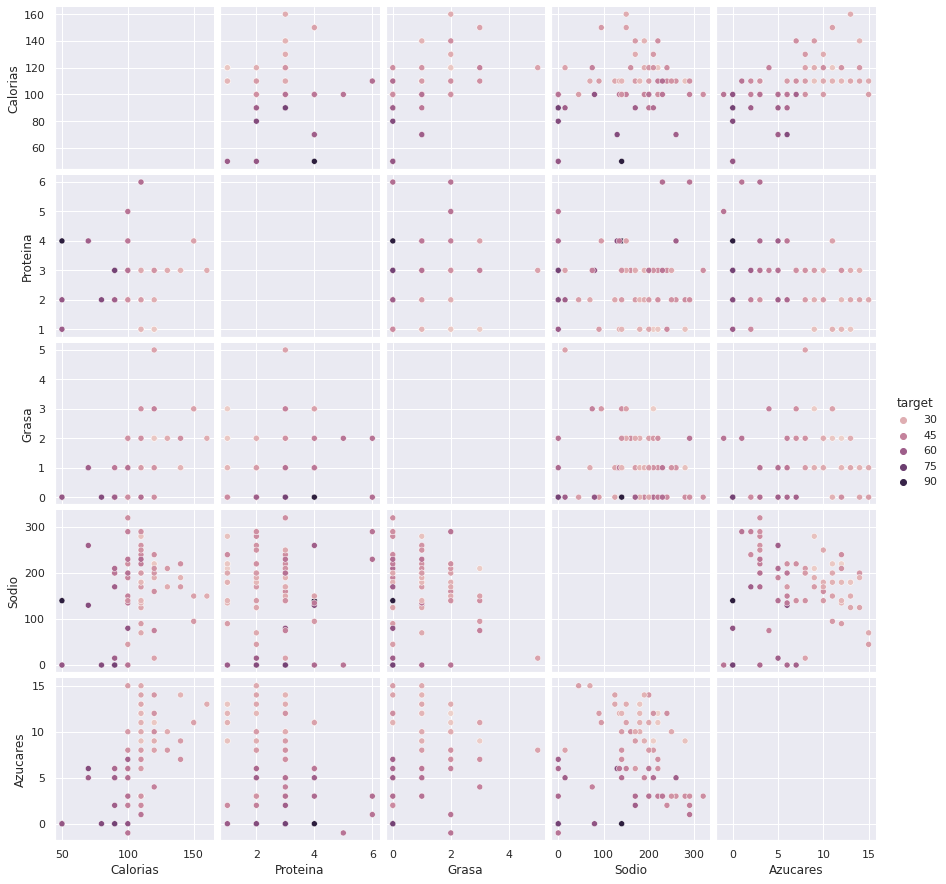

In [ ]:
%matplotlib inline

sns.set()
sns.pairplot(df_Data, hue="target")

In [ ]:
#Splitting ("Division de los datos")
# train_test_split (dataset, % del entrenamiento)
dataset_train, dataset_test = train_test_split(df_Data, train_size=0.75, shuffle=True)

#verificar el data set
dataset_train

#verificar el test
dataset_test

,Calorias,Proteina,Grasa,Sodio,Azucares,target
69,110,2,1,200,3,38.839746
48,120,2,1,190,9,29.924285
19,110,3,3,140,7,40.448772
71,100,3,1,200,3,46.658844
10,120,1,2,220,12,18.042851
50,90,3,0,170,2,59.642837
42,110,2,1,180,12,26.734515
8,90,2,1,200,6,49.120253
52,120,3,1,200,14,37.840594
12,120,1,3,210,9,19.823573


In [ ]:
#separacion del Target y los features
#AHORA LOS features son X, el Target es Y
dataset_train_X = dataset_train.drop("target", axis="columns")
dataset_train_Y = dataset_train["target"]
dataset_test_X = dataset_test.drop("target", axis="columns")
dataset_test_Y = dataset_test["target"]

dataset_train_Y

13    40.400208
64    74.472949
44    37.136863
39    36.471512
46    30.313351
30    35.252444
68    59.363993
54    60.756112
16    45.863324
61    41.998933
38    36.523683
62    40.560159
25    31.435973
7     37.038562
28    41.015492
49    40.692320
21    46.895644
75    51.592193
6     33.174094
31    23.804043
53    41.503540
74    49.787445
70    28.592785
76    36.187559
24    32.207582
32    52.076897
66    31.230054
5     29.509541
35    21.871292
36    31.072217
23    44.330856
18    22.396513
11    50.764999
59    39.703400
40    39.241114
2     59.425505
4     34.384843
14    22.736446
15    41.445019
3     93.704912
47    40.105965
43    54.850917
73    27.753301
34    45.811716
55    63.005645
37    28.742414
26    58.345141
17    35.782791
1     33.983679
45    34.139765
57    50.828392
20    64.533816
27    40.917047
65    72.801787
41    45.328074
51    30.450843
56    49.511874
Name: target, dtype: float64

In [ ]:
#Algoritmo de Regresión lineal (Supervisado)

#Regresión Lineal

#importar el modelo a ser utilizado
from sklearn.linear_model import LinearRegression  #Escoger el modelo de aprendizaje

#Instanciar el modelo
model = LinearRegression()

#model.fit Toma features y target

model.fit(dataset_train_X, dataset_train_Y)

LinearRegression()

In [ ]:
'''
#Validacion Automatica
#la funcion model.score toma como argumento (Target_Validation, Inferencia)
Exactitud = model.score(dataset_test_X,dataset_test_Y)
print("Exactitud: ", Exactitud*100,"%")
'''

'\n#Validacion Automatica\n#la funcion model.score toma como argumento (Target_Validation, Inferencia)\nExactitud = model.score(dataset_test_X,dataset_test_Y)\nprint("Exactitud: ", Exactitud*100,"%")\n'

In [ ]:
#Inferencia del modelo
inferencia = model.predict(dataset_test_X) #Prediccion del modelo

#Se guardan los datos en listas para facilitar las operaciones
x = [float(inferencia[i]) for i in range(len(inferencia))]
y = [float(dataset_test_Y.loc[i]) for i in dataset_test_Y.index]

result = [((x[i]*100)/y[i]) for i in range(len(x))]

print('resultados por valor: ', result)

n = 0.0
for i in range(len(result)):
  n = n + result[i]

n = n/len(result)

print("Exactitud: ", n,"%")

resultados por valor:  [110.0993479037924, 112.9243128363615, 92.39854095713699, 105.96496876869767, 108.64997543539398, 96.39539580118898, 119.2428915488046, 85.50779090287313, 84.45896957917053, 101.02994756465161, 103.95181669511753, 102.31017279207336, 98.22631870276619, 99.38233034439604, 93.41766143624601, 123.8908407682811, 85.25376271122634, 104.34482718554789, 86.97009544220289, 97.33906889770073]
Exactitud:  100.58795181368147 %


In [ ]:
# Usar codificador de etiquetas en datos categóricos para varias columnas
le = preprocessing.LabelEncoder()
 
# Implementando LE(codificacion de etiquetas) en los fabricantes de cereales
le.fit(data.Fabricante.drop_duplicates()) 
data.Fabricante = le.transform(data.Fabricante)

# Implementando LE en el tipo de cereal (frio o caliente)
le.fit(data.tipo.drop_duplicates()) 
data.tipo = le.transform(data.tipo)
plt.figure(figsize=(15,10))
 # CREACION MATRIZ DE CONFUCION
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#nuevo cereal llamado "Lucky Loops"

dataset_new_Cereal = dataset_test_X
dataset_new_Cereal = dataset_new_Cereal[1:2]
dataset_new_Cereal["Calorias"] = 125
dataset_new_Cereal["Proteina"] = 1
dataset_new_Cereal["Grasa"] = 1
dataset_new_Cereal["Sodio"] = 12
dataset_new_Cereal["Azucares"] = 23
dataset_new_Cereal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Calorias,Proteina,Grasa,Sodio,Azucares
48,125,1,1,12,23


In [ ]:
#Se ve que la aprobación del nuevo cereal es muy baja y que no tendría mucha acogida
inferencia_dataset_new_Cereal = model.predict(dataset_new_Cereal)
inferencia_dataset_new_Cereal

array([17.17048084])

In [ ]:
'''
#Importar para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y,x)
plt.figure(figsize=fig_size)
plt.title('Confusion matrix of the classifier')
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.ylabel('True')
plt.ioff()
plt.show()
'''